In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
inputs = tf.keras.Input(shape=(28,28,3)) 
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10)(x)
x = tf.keras.layers.Activation('softmax')(x)

In [4]:
model = tf.keras.Model(inputs, x)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496 

In [7]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [10]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               width_shift_range=0.2,
                               height_shift_range=0.1,
                               zoom_range=0.1)

In [11]:
training_set = train_gen.flow_from_directory('/home/a/datasets/mnist_png/training',
                                            target_size=(28,28),
                                            color_mode='rgb')

test_set = train_gen.flow_from_directory('/home/a/datasets/mnist_png/testing',
                                            target_size=(28,28),
                                            color_mode='rgb')

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [12]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', # better than val_acc
                                               patience=3, 
                                               mode='auto', # default
                                               verbose=1)

In [13]:
history = model.fit(training_set,
                         steps_per_epoch=300, # 300
                         validation_data=test_set,
                         validation_steps=50, # 50
                         epochs=30,
                         callbacks=[es_callback])

Epoch 1/30
300/300 [==============================] - 9s 28ms/step - loss: 0.6792 - accuracy: 0.7769 - val_loss: 0.2389 - val_accuracy: 0.9237
Epoch 2/30
300/300 [==============================] - 10s 32ms/step - loss: 0.2334 - accuracy: 0.9292 - val_loss: 0.1548 - val_accuracy: 0.9494
Epoch 3/30
300/300 [==============================] - 11s 35ms/step - loss: 0.1705 - accuracy: 0.9494 - val_loss: 0.1281 - val_accuracy: 0.9594
Epoch 4/30
300/300 [==============================] - 11s 37ms/step - loss: 0.1368 - accuracy: 0.9568 - val_loss: 0.0995 - val_accuracy: 0.9681
Epoch 5/30
300/300 [==============================] - 11s 38ms/step - loss: 0.1250 - accuracy: 0.9626 - val_loss: 0.1128 - val_accuracy: 0.9638
Epoch 6/30
300/300 [==============================] - 11s 37ms/step - loss: 0.1139 - accuracy: 0.9666 - val_loss: 0.0860 - val_accuracy: 0.9731
Epoch 7/30
300/300 [==============================] - 10s 34ms/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.0728 - val_accuracy: 

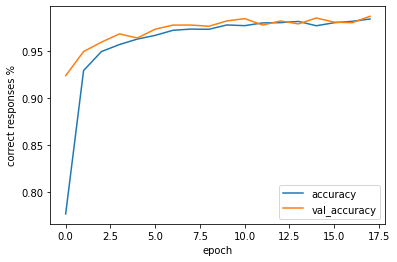

In [14]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

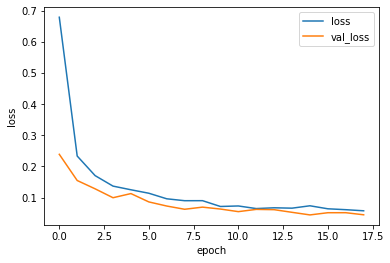

In [15]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
model.save('es_func_folder_x3.h5')